In [25]:
import glob
import numpy as np
import os
import shutil
np.random.seed(34)

In [26]:
dataset = glob.glob('train/*')

cats_data = [filename for filename in dataset if 'cat' in filename]
dogs_data = [filename for filename in dataset if 'dog' in filename]
print('Original cats data size:', len(cats_data))
print('Original dogs data size:', len(dogs_data))

Original cats data size: 12500
Original dogs data size: 12500


In [27]:
cats_train = np.random.choice(cats_data, size=1500, replace=False)
dogs_train = np.random.choice(dogs_data, size=1500, replace=False)

cats_data = list(set(cats_data) - set(cats_train))
dogs_data = list(set(dogs_data) - set(dogs_train))

cats_validation = np.random.choice(cats_data, size=500, replace=False)
dogs_validation = np.random.choice(dogs_data, size=500, replace=False)

cats_data = list(set(cats_data) - set(cats_val))
dogs_data = list(set(dogs_data) - set(dogs_val))

cats_test = np.random.choice(cats_data, size=500, replace=False)
dogs_test = np.random.choice(dogs_data, size=500, replace=False)

print('Trimed cats data size:', cats_train.shape, cats_validation.shape, cats_test.shape)
print('Trimed dogs data size:', dogs_train.shape, dogs_validation.shape, dogs_test.shape)

Trimed cats data size: (1500,) (500,) (500,)
Trimed dogs data size: (1500,) (500,) (500,)


In [28]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [32]:
IMAGE_SIZE = (150, 150)

train_data = np.concatenate([cats_train, dogs_train])
validation_data = np.concatenate([cats_validation, dogs_validation])
test_data = np.concatenate([cats_test, dogs_test])

train_images = [img_to_array(load_img(image, target_size=IMAGE_SIZE)) for image in train_data]
train_images = np.array(train_images)
train_labels = [filename.split('\\')[1].split('.')[0].strip() for filename in train_data]

validation_images = [img_to_array(load_img(image, target_size=IMAGE_SIZE)) for image in validation_data]
validation_images = np.array(validation_images)
validation_labels = [filename.split('\\')[1].split('.')[0].strip() for filename in validation_data]

print('Train dataset shape:', train_images.shape)
print('Validation dataset shape:', validation_images.shape)

Train dataset shape: (3000, 150, 150, 3)
Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


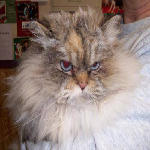

In [33]:
train_images_scaled = train_images.astype('float32')
validation_images_scaled  = validation_images.astype('float32')

train_images_scaled /= 255
validation_images_scaled /= 255

print(train_images[34].shape)
array_to_img(train_images[34])

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_labels)
train_labels_converted = label_encoder.transform(train_labels)
validation_labels_converted = label_encoder.transform(validation_labels)

print(train_labels[1495:1505])
print(train_labels_converted[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']
[0 0 0 0 0 1 1 1 1 1]


In [38]:
batch_size = 30
number_of_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [40]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

CNN = Sequential()

CNN.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Flatten())
CNN.add(Dense(512, activation='relu'))
CNN.add(Dense(1, activation='sigmoid'))

CNN.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [41]:
CNN_history = CNN.fit(x=train_images_scaled, y=train_labels_converted,
                    validation_data=(validation_images_scaled, validation_labels_converted),
                    batch_size=batch_size, epochs=epochs, verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 282s 94ms/step - loss: 1.0489 - accuracy: 0.5297 - val_loss: 0.6615 - val_accuracy: 0.6000
Epoch 2/30
3000/3000 [==============================] - 280s 93ms/step - loss: 0.6714 - accuracy: 0.6093 - val_loss: 0.6394 - val_accuracy: 0.6050
Epoch 3/30
3000/3000 [==============================] - 276s 92ms/step - loss: 0.5878 - accuracy: 0.6910 - val_loss: 0.5423 - val_accuracy: 0.7360
Epoch 4/30
3000/3000 [==============================] - 275s 92ms/step - loss: 0.4920 - accuracy: 0.7673 - val_loss: 0.4916 - val_accuracy: 0.7580
Epoch 5/30
3000/3000 [==============================] - 275s 92ms/step - loss: 0.4005 - accuracy: 0.8183 - val_loss: 0.5327 - val_accuracy: 0.7430
Epoch 6/30
3000/3000 [==============================] - 279s 93ms/step - loss: 0.3104 - accuracy: 0.8690 - val_loss: 0.5494 - val_accuracy: 0.7570
Epoch 7/30
3000/3000 [==============================] - 279s 93ms/step

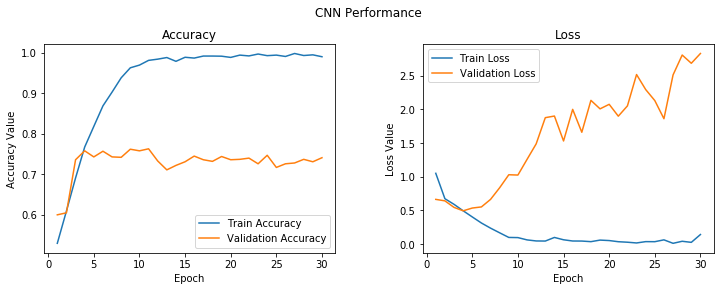

In [45]:
figure, (graph1, graph2) = plt.subplots(1, 2, figsize=(12, 4))
title = figure.suptitle('CNN Performance', fontsize=12)
figure.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
graph1.plot(epoch_list, CNN_history.history['accuracy'], label='Train Accuracy')
graph1.plot(epoch_list, CNN_history.history['val_accuracy'], label='Validation Accuracy')
graph1.set_xticks(np.arange(0, 31, 5))
graph1.set_ylabel('Accuracy Value')
graph1.set_xlabel('Epoch')
graph1.set_title('Accuracy')
legend1 = graph1.legend(loc="best")

graph2.plot(epoch_list, CNN_history.history['loss'], label='Train Loss')
graph2.plot(epoch_list, CNN_history.history['val_loss'], label='Validation Loss')
graph2.set_xticks(np.arange(0, 31, 5))
graph2.set_ylabel('Loss Value')
graph2.set_xlabel('Epoch')
graph2.set_title('Loss')
legend2 = graph2.legend(loc="best")

In [48]:
CNN_regularized = Sequential()

CNN_regularized.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
CNN_regularized.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_regularized.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_regularized.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_regularized.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized.add(Flatten())
CNN_regularized.add(Dense(512, activation='relu'))
CNN_regularized.add(Dropout(0.3))
CNN_regularized.add(Dense(512, activation='relu'))
CNN_regularized.add(Dropout(0.3))
CNN_regularized.add(Dense(1, activation='sigmoid'))

CNN_regularized.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

CNN_regularized.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [49]:
history = CNN_regularized.fit(x=train_images_scaled, y=train_labels_converted,
                            validation_data=(validation_images_scaled, validation_labels_converted),
                            batch_size=batch_size, epochs=epochs, verbose=1)  

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 289s 96ms/step - loss: 0.7013 - accuracy: 0.5217 - val_loss: 0.6716 - val_accuracy: 0.6100
Epoch 2/30
3000/3000 [==============================] - 294s 98ms/step - loss: 0.6555 - accuracy: 0.6303 - val_loss: 0.6411 - val_accuracy: 0.6710
Epoch 3/30
3000/3000 [==============================] - 295s 98ms/step - loss: 0.6064 - accuracy: 0.6803 - val_loss: 0.5847 - val_accuracy: 0.7040
Epoch 4/30
3000/3000 [==============================] - 293s 98ms/step - loss: 0.5457 - accuracy: 0.7247 - val_loss: 0.5046 - val_accuracy: 0.7700
Epoch 5/30
3000/3000 [==============================] - 291s 97ms/step - loss: 0.5081 - accuracy: 0.7493 - val_loss: 0.6562 - val_accuracy: 0.6370
Epoch 6/30
3000/3000 [==============================] - 292s 97ms/step - loss: 0.4503 - accuracy: 0.7960 - val_loss: 0.4560 - val_accuracy: 0.7840
Epoch 7/30
3000/3000 [==============================] - 295s 98ms/step

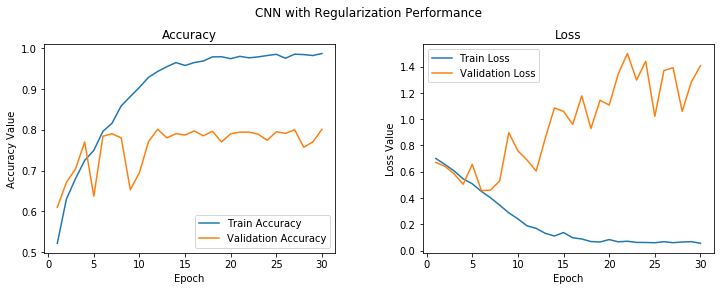

In [50]:
figure, (graph1, graph2) = plt.subplots(1, 2, figsize=(12, 4))
title = figure.suptitle('CNN with Regularization Performance', fontsize=12)
figure.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
graph1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
graph1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
graph1.set_xticks(np.arange(0, 31, 5))
graph1.set_ylabel('Accuracy Value')
graph1.set_xlabel('Epoch')
graph1.set_title('Accuracy')
legend1 = graph1.legend(loc="best")

graph2.plot(epoch_list, history.history['loss'], label='Train Loss')
graph2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
graph2.set_xticks(np.arange(0, 31, 5))
graph2.set_ylabel('Loss Value')
graph2.set_xlabel('Epoch')
graph2.set_title('Loss')
legend2 = graph2.legend(loc="best")

In [59]:
train_data_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                        width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                        horizontal_flip=True, fill_mode='nearest')

validation_data_generator = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


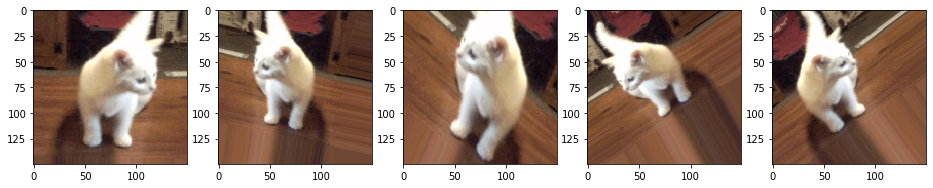

In [70]:
image_id = 100

generator = train_data_generator.flow(train_images[image_id:image_id+1], train_labels[image_id:image_id+1], batch_size=1)

cat_agumented = [next(generator) for i in range(0,5)]
figure, axis = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat_agumented])
show = [axis[i].imshow(cat_agumented[i][0][0]) for i in range(0,5)]

In [60]:
train_data_agumented = train_data_generator.flow(train_images, train_labels_converted, batch_size=30)
validation_data_agumented = validation_data_generator.flow(validation_images, validation_labels_converted, batch_size=20)

In [61]:
CNN_regularized_agumented = Sequential()

CNN_regularized_agumented.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
CNN_regularized_agumented.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized_agumented.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_regularized_agumented.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized_agumented.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_regularized_agumented.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized_agumented.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_regularized_agumented.add(MaxPooling2D(pool_size=(2, 2)))

CNN_regularized_agumented.add(Flatten())
CNN_regularized_agumented.add(Dense(512, activation='relu'))
CNN_regularized_agumented.add(Dropout(0.3))
CNN_regularized_agumented.add(Dense(512, activation='relu'))
CNN_regularized_agumented.add(Dropout(0.3))
CNN_regularized_agumented.add(Dense(1, activation='sigmoid'))

CNN_regularized_agumented.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

CNN_regularized_agumented.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 128)      

In [63]:
CNN_regularized_agumented_history = CNN_regularized_agumented.fit_generator(train_data_agumented, steps_per_epoch=100,
                                                                            epochs=100, validation_data=validation_data_agumented,
                                                                            validation_steps=50, erbose=1)              

Epoch 1/100
100/100 [==============================] - 295s 3s/step - loss: 0.6910 - accuracy: 0.5097 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 2/100
100/100 [==============================] - 300s 3s/step - loss: 0.6817 - accuracy: 0.5567 - val_loss: 0.6643 - val_accuracy: 0.5990
Epoch 3/100
100/100 [==============================] - 301s 3s/step - loss: 0.6691 - accuracy: 0.5923 - val_loss: 0.6325 - val_accuracy: 0.6210
Epoch 4/100
100/100 [==============================] - 300s 3s/step - loss: 0.6557 - accuracy: 0.6097 - val_loss: 0.5733 - val_accuracy: 0.6620
Epoch 5/100
100/100 [==============================] - 299s 3s/step - loss: 0.6419 - accuracy: 0.6200 - val_loss: 0.5293 - val_accuracy: 0.6080
Epoch 6/100
100/100 [==============================] - 301s 3s/step - loss: 0.6258 - accuracy: 0.6520 - val_loss: 0.6691 - val_accuracy: 0.6520
Epoch 7/100
100/100 [==============================] - 301s 3s/step - loss: 0.6168 - accuracy: 0.6593 - val_loss: 0.5259 - val_accuracy:

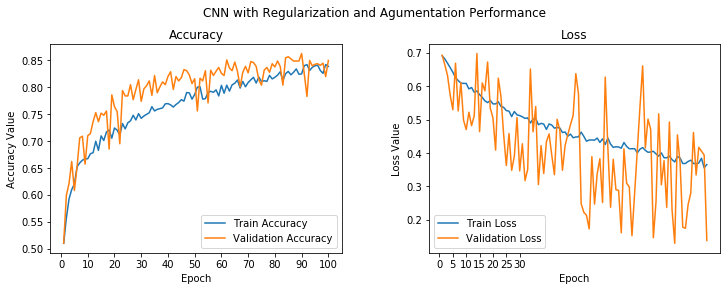

In [65]:
figure, (graph1, graph2) = plt.subplots(1, 2, figsize=(12, 4))
title = figure.suptitle('CNN with Regularization and Agumentation Performance', fontsize=12)
figure.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
graph1.plot(epoch_list, CNN_regularized_agumented_history.history['accuracy'], label='Train Accuracy')
graph1.plot(epoch_list, CNN_regularized_agumented_history.history['val_accuracy'], label='Validation Accuracy')
graph1.set_xticks(np.arange(0, 101, 10))
graph1.set_ylabel('Accuracy Value')
graph1.set_xlabel('Epoch')
graph1.set_title('Accuracy')
legend1 = graph1.legend(loc="best")

graph2.plot(epoch_list, CNN_regularized_agumented_history.history['loss'], label='Train Loss')
graph2.plot(epoch_list, CNN_regularized_agumented_history.history['val_loss'], label='Validation Loss')
graph2.set_xticks(np.arange(0, 31, 5))
graph2.set_ylabel('Loss Value')
graph2.set_xlabel('Epoch')
graph2.set_title('Loss')
legend2 = graph2.legend(loc="best")

In [71]:
from keras.applications import vgg16
from keras.models import Model
import keras
import pandas as pd

VGG16 = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = VGG16.layers[-1].output
output = keras.layers.Flatten()(output)
VGG16_model = Model(VGG16.input, output)

VGG16_model.trainable = False
for layer in VGG16_model.layers:layer.trainable = False
    
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in VGG16_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

58892288/58889256 [==============================] - 14s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x0000024993BA42C8>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x0000024993BA4908>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000024993BA4D48>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x0000024993BA4C08>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x0000024993BA8448>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x0000024993B9DD08>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x0000024993BAE088>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x0000024993BB15C8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x0000024993BB4AC8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x0000024993BB7248>,block3_conv3,False


(1, 4, 4, 512)


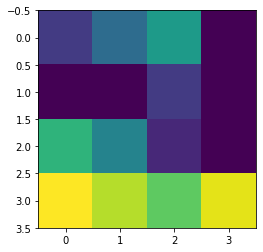

In [76]:
extracted_bottleneck = VGG16.predict(train_images_scaled[0:1])
print(extracted_bottleneck.shape)
plt.imshow(extracted_bottleneck[0][:,:,0])

In [ ]:
def obtain_features(model, input_images):
    features = model.predict(input_images, verbose=0)
    return features
    
train_images_features = obtain_features(VGG16_model, train_images_scaled)
validation_images_features = obtain_features(VGG16_model, validation_images_scaled)

In [78]:
print('Train Images Bottleneck Features:', train_images_features.shape)
print('Validation Images Bottleneck Features:', validation_images_features.shape)

Train Images Bottleneck Features: (3000, 8192)
Validation Images Bottleneck Features: (1000, 8192)


In [81]:
from keras.layers import InputLayer

input_shape = VGG16_model.output_shape[1]

CNN_TL_VGG16 = Sequential()
CNN_TL_VGG16.add(InputLayer(input_shape=(input_shape,)))
CNN_TL_VGG16.add(Dense(512, activation='relu', input_dim=input_shape))
CNN_TL_VGG16.add(Dropout(0.3))
CNN_TL_VGG16.add(Dense(512, activation='relu'))
CNN_TL_VGG16.add(Dropout(0.3))
CNN_TL_VGG16.add(Dense(1, activation='sigmoid'))

CNN_TL_VGG16.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

CNN_TL_VGG16.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [82]:
CNN_TL_VGG16_history = CNN_TL_VGG16.fit(x=train_images_features, y=train_labels_converted,
                                        validation_data=(validation_images_features, validation_labels_converted),
                                        batch_size=batch_size, epochs=epochs, verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4362 - accuracy: 0.7880 - val_loss: 0.3079 - val_accuracy: 0.8530
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2928 - accuracy: 0.8727 - val_loss: 0.2633 - val_accuracy: 0.8860
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2341 - accuracy: 0.9017 - val_loss: 0.2556 - val_accuracy: 0.8920
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2000 - accuracy: 0.9143 - val_loss: 0.2403 - val_accuracy: 0.8870
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1743 - accuracy: 0.9277 - val_loss: 0.2503 - val_accuracy: 0.8930
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1374 - accuracy: 0.9460 - val_loss: 0.3214 - val_accuracy: 0.8780
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1253 - acc

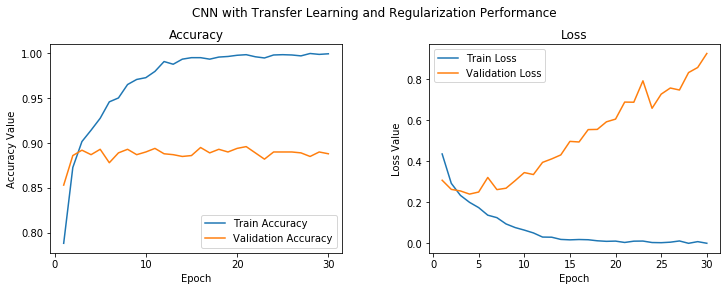

In [84]:
figure, (graph1, graph2) = plt.subplots(1, 2, figsize=(12, 4))
title = figure.suptitle('CNN with Transfer Learning and Regularization Performance', fontsize=12)
figure.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
graph1.plot(epoch_list, CNN_TL_VGG16_history.history['accuracy'], label='Train Accuracy')
graph1.plot(epoch_list, CNN_TL_VGG16_history.history['val_accuracy'], label='Validation Accuracy')
graph1.set_xticks(np.arange(0, 31, 10))
graph1.set_ylabel('Accuracy Value')
graph1.set_xlabel('Epoch')
graph1.set_title('Accuracy')
legend1 = graph1.legend(loc="best")

graph2.plot(epoch_list, CNN_TL_VGG16_history.history['loss'], label='Train Loss')
graph2.plot(epoch_list, CNN_TL_VGG16_history.history['val_loss'], label='Validation Loss')
graph2.set_xticks(np.arange(0, 31, 5))
graph2.set_ylabel('Loss Value')
graph2.set_xlabel('Epoch')
graph2.set_title('Loss')
legend2 = graph2.legend(loc="best")

In [92]:
import model_evaluation_utils as meu

binary_to_class = lambda label: ['cat' if x == 0 else 'dog' for x in label]
class_to_binary = lambda label: [0 if x == 'cat' else 1 for x in label]

test_images = [img_to_array(load_img(image, target_size=IMAGE_SIZE)) for image in test_data]
test_images = np.array(test_images)
test_labels = [filename.split('\\')[1].split('.')[0].strip() for filename in test_data]

test_images_scaled = test_images.astype('float32')
test_images_scaled /= 255
test_labels_converted = class_to_binary(test_labels)

print('Test dataset shape:', test_images.shape)
print(test_labels[0:5], test_labels_converted[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'cat', 'cat', 'cat'] [0, 0, 0, 0, 0]


In [94]:
result = CNN.predict_classes(test_images_scaled, verbose=0)
result = binary_to_class(result)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=result, classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.737
Precision: 0.7376
Recall: 0.737
F1 Score: 0.7368

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.73      0.76      0.74       500
         dog       0.75      0.71      0.73       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  381        119
        dog  144        356


C:\Users\Robert\model_evaluation_utils.py:61: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
C:\Users\Robert\model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [95]:
result = CNN_regularized.predict_classes(test_images_scaled, verbose=0)
result = binary_to_class(result)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=result, classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.768
Precision: 0.7712
Recall: 0.768
F1 Score: 0.7673

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.74      0.82      0.78       500
         dog       0.80      0.71      0.75       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  411        89 
        dog  143        357


In [96]:
result = CNN_regularized_agumented.predict_classes(test_images_scaled, verbose=0)
result = binary_to_class(result)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=result, classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.839
Precision: 0.8391
Recall: 0.839
F1 Score: 0.839

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.84      0.83      0.84       500
         dog       0.83      0.85      0.84       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  416        84 
        dog  77         423


In [97]:
test_images_features = obtain_features(VGG16_model, test_images_scaled)

result = CNN_TL_VGG16.predict_classes(test_images_features, verbose=0)
result = binary_to_class(result)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=result, classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.886
Precision: 0.8861
Recall: 0.886
F1 Score: 0.886

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.88      0.89      0.89       500
         dog       0.89      0.88      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  446        54 
        dog  60         440


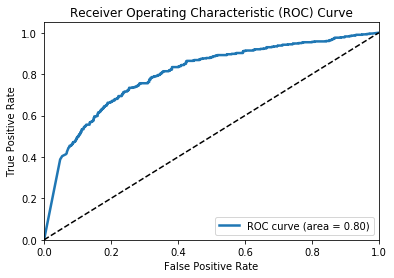

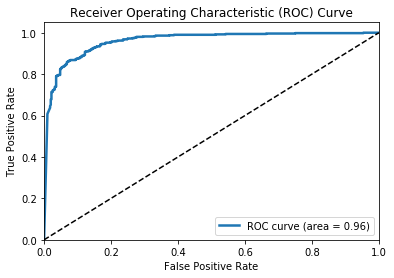

In [100]:
meu.plot_model_roc_curve(CNN, test_images_scaled, true_labels=test_labels_converted, class_names=[0, 1]) 

meu.plot_model_roc_curve(CNN_TL_VGG16, test_images_features, true_labels=test_labels_converted, class_names=[0, 1])